In [42]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data
ratings_column = ["MovieID","UserID","Rating"]
movie_ratings = pd.read_csv("netflix/ratings.txt",delimiter=",",names=ratings_column)
#movie_ratings.head()
#movie_ratings.shape
movie_column = ["MovieID","YearofRelease","Title"]
movie_titles = pd.read_csv("netflix/movie_titles.txt",delimiter=",", encoding="ISO-8859-1",names=movie_column)
#movie_titles.head()
#movie_titles.shape

,MovieID,YearofRelease,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [43]:
# Merge both movie ratings and movie title data
movie_data = pd.merge(movie_ratings,movie_titles,on="MovieID")

In [44]:
movie_data.groupby("Title")["Rating"].mean().sort_values(ascending=False).head()

Title
The Twilight Zone: Vol. 36                        4.179767
Farscape: The Peacekeeper Wars: Bonus Material    4.047619
Animal Crackers                                   4.012064
The Cowboys                                       3.838180
Door to Door                                      3.825653
Name: Rating, dtype: float64

In [45]:
# found the total number of ratings for a particular movie
movie_data.groupby("Title")["Rating"].count().sort_values(ascending=False).head()

Title
Sweet Home Alabama    20873
Beverly Hills Cop     20140
Tomb Raider           19935
Gremlins              19580
13 Going on 30        16542
Name: Rating, dtype: int64

In [46]:
# test basis
mean_rating_count = pd.DataFrame(movie_data.groupby("Title")["Rating"].mean())
mean_rating_count["mean_rating_counts"] = pd.DataFrame(movie_data.groupby("Title")["Rating"].count())
mean_rating_count.head()

,Rating,mean_rating_counts
Title,,
13 Going on 30,3.502116,16542
2002 Olympic Figure Skating Exhibition,2.000000,31
4 Little Girls,3.704545,968
A Touch of Frost: Season 5,3.764706,102
ABC News Presents: Jesus,2.652174,46


<AxesSubplot:>

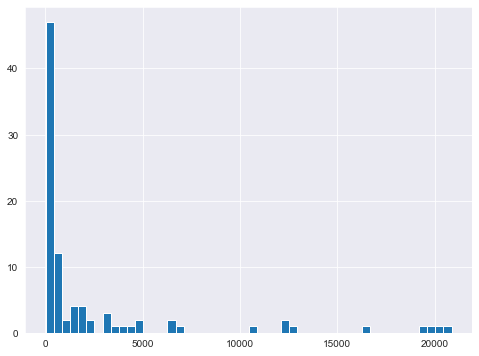

In [47]:
# plot a histogram of average rating count
sns.set_style('dark')
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
mean_rating_count['mean_rating_counts'].hist(bins=50)